In [ ]:
!python figure_eigensources_M_1D.py

In [ ]:
!python figure_Tbasis.py

In [40]:
import figure_Tbasis as fb
import targeted_basis as tb
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from figure_properties import *
import os

Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0


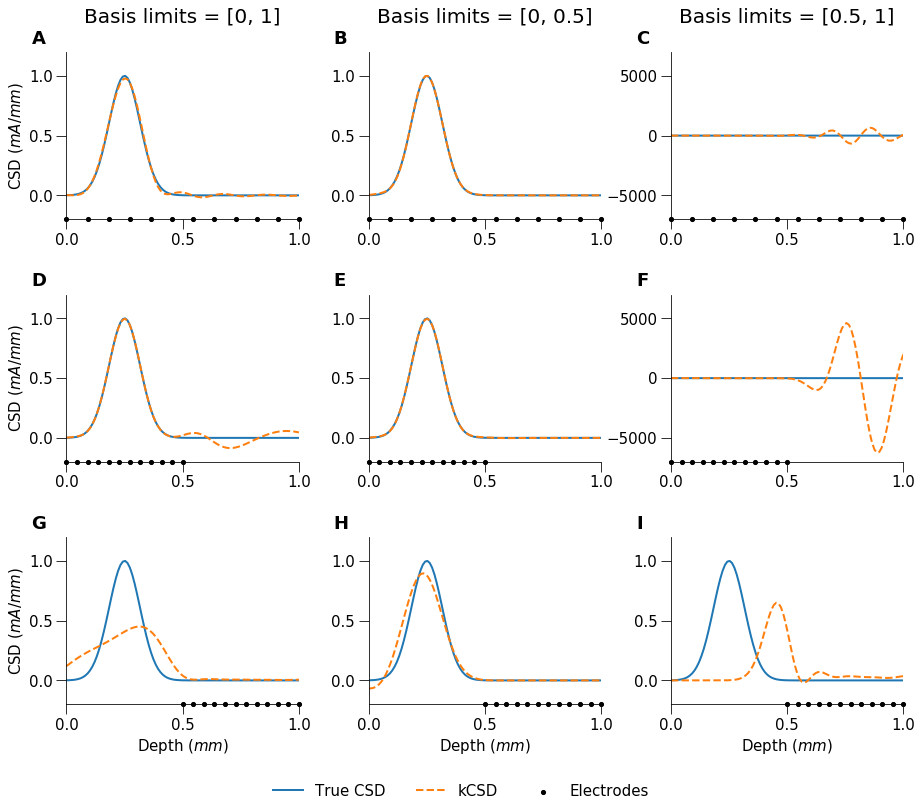

In [2]:
N_SRC = 64
TRUE_CSD_XLIMS = [0., 1.]
TOTAL_ELE = 12
R = 0.2
MU = 0.25
method = 'cross-validation'  # L-curve
#    method = 'L-curve'
Rs = np.array([0.2])
lambdas = np.zeros(1)
tb.generate_figure(R, MU, N_SRC, TRUE_CSD_XLIMS, TOTAL_ELE,
                method=method, Rs=Rs, lambdas=lambdas, noise=0)

In [154]:
from sklearn import preprocessing
def calculate_eigensources(obj):        
    try:
        eigenvalue, eigenvector = np.linalg.eigh(obj.k_pot +
                                                 obj.lambd *
                                                 np.identity
                                                 (obj.k_pot.shape[0]))
        print('lambd: ', obj.lambd)
    except LinAlgError:
        raise LinAlgError('EVD is failing - try moving the electrodes'
                          'slightly')
    idx = eigenvalue.argsort()[::-1]
    eigenvalues = eigenvalue[idx]
    eigenvectors = eigenvector[:, idx]
    eigensources = np.dot(obj.k_interp_cross, eigenvectors)
    #for i in range(len(eigenvalues)):
    #    eigensources[:, i] = eigensources[:, i]/np.max(abs(eigensources[:, i]))
    #eigensources = eigensources/np.max(abs(eigensources))
    eigensources = eigensources/np.linalg.norm(eigensources)
    #eigensources = preprocessing.normalize(eigensources, axis=0)
    return eigensources

In [34]:
def generate_figure(R, MU, n_src, true_csd_xlims, total_ele,
                    method='cross-validation', Rs=None, lambdas=None,
                    noise=0):
    """
    Generates figure for targeted basis investigation.

    Parameters
    ----------
    R: float
        Thickness of the groundtruth source.
        Default: 0.2.
    MU: float
        Central position of Gaussian source
        Default: 0.25.
    nr_src: int
        Number of basis sources.
    true_csd_xlims: list
        Boundaries for ground truth space.
    total_ele: int
        Number of electrodes.
    save_path: string
        Directory.
    method: string
        Determines the method of regularization.
        Default: cross-validation.
    Rs: numpy 1D array
        Basis source parameter for crossvalidation.
        Default: None.
    lambdas: numpy 1D array
        Regularization parameter for crossvalidation.
        Default: None.
    noise: float
        Determines the level of noise in the data.
        Default: 0.

    Returns
    -------
    None
    """

    ele_lims = [0, 1.]
    csd_at, true_csd, ele_pos, pots, val = tb.simulate_data(tb.csd_profile,
                                                            true_csd_xlims, R,
                                                            MU, total_ele,
                                                            ele_lims,
                                                            noise=noise)

    fig = plt.figure(figsize=(15, 12))
    widths = [1, 1, 1]
    heights = [1, 1, 1]
    gs = gridspec.GridSpec(3, 3, height_ratios=heights, width_ratios=widths,
                           hspace=0.45, wspace=0.3)

    ax = fig.add_subplot(gs[0, 0])
    xmin = 0
    xmax = 1
    ext_x = 0
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    print(eigensources.shape)
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title='Basis limits = [0, 1]', xlabel=False, ylabel=True,
                 letter='A')

    ax = fig.add_subplot(gs[0, 1])
    xmin = -0.5
    xmax = 1
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title='Basis limits = [0, 0.5]', xlabel=False, ylabel=False,
                 letter='B')

    ax = fig.add_subplot(gs[0, 2])
    xmin = 0
    xmax = 1.5
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src,  h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title='Basis limits = [0.5, 1]', xlabel=False, ylabel=False,
                 letter='C')

    ele_lims = [0, 0.5]
#    total_ele = 6
    csd_at, true_csd, ele_pos, pots, val = tb.simulate_data(tb.csd_profile,
                                                            true_csd_xlims, R,
                                                            MU, total_ele,
                                                            ele_lims,
                                                            noise=noise)
    ax = fig.add_subplot(gs[1, 0])
    xmin = 0
    xmax = 1
    ext_x = 0
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=True, letter='D')

    ax = fig.add_subplot(gs[1, 1])
    xmin = -0.5
    xmax = 1
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='E')

    ax = fig.add_subplot(gs[1, 2])
    xmin = 0
    xmax = 1.5
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='F')

    ele_lims = [0.5, 1.]
    csd_at, true_csd, ele_pos, pots, val = tb.simulate_data(tb.csd_profile,
                                                            true_csd_xlims, R,
                                                            MU, total_ele,
                                                            ele_lims,
                                                            noise=noise)
    ax = fig.add_subplot(gs[2, 0])
    xmin = 0
    xmax = 1
    ext_x = 0
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=True, ylabel=True, letter='G')

    ax = fig.add_subplot(gs[2, 1])
    xmin = -0.5
    xmax = 1
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=True, ylabel=False, letter='H')

    ax = fig.add_subplot(gs[2, 2])
    xmin = 0
    xmax = 1.5
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    eigensources = calculate_eigensources(obj)
    ax = make_subplot(ax, eigensources, obj.estm_x,
                      ele_pos=ele_pos, title=None, xlabel=True, ylabel=False,
                      letter='I')
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, frameon=False)

    fig.savefig(os.path.join('eigensources_targeted_basis_noise_' + str(noise) + '.png'), dpi=300)
    plt.show()

In [37]:
def make_subplot(ax, eigensources, estm_x, title=None, ele_pos=None,
                 xlabel=False, ylabel=False, letter='', t_max=None):
    l1 = ax.plot(estm_x, eigensources[:, :6], lw=2.)
    ax.set_xlim([0, 1])
    if xlabel:
        ax.set_xlabel('Depth ($mm$)')
    if ylabel:
        ax.set_ylabel('CSD ($mA/mm$)')
    if title is not None:
        ax.set_title(title)
    ax.set_xticks([0, 0.5, 1])
    fb.set_axis(ax, letter=letter)
    # ax.legend(frameon=False, loc='upper center', ncol=3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
(100, 12)
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0


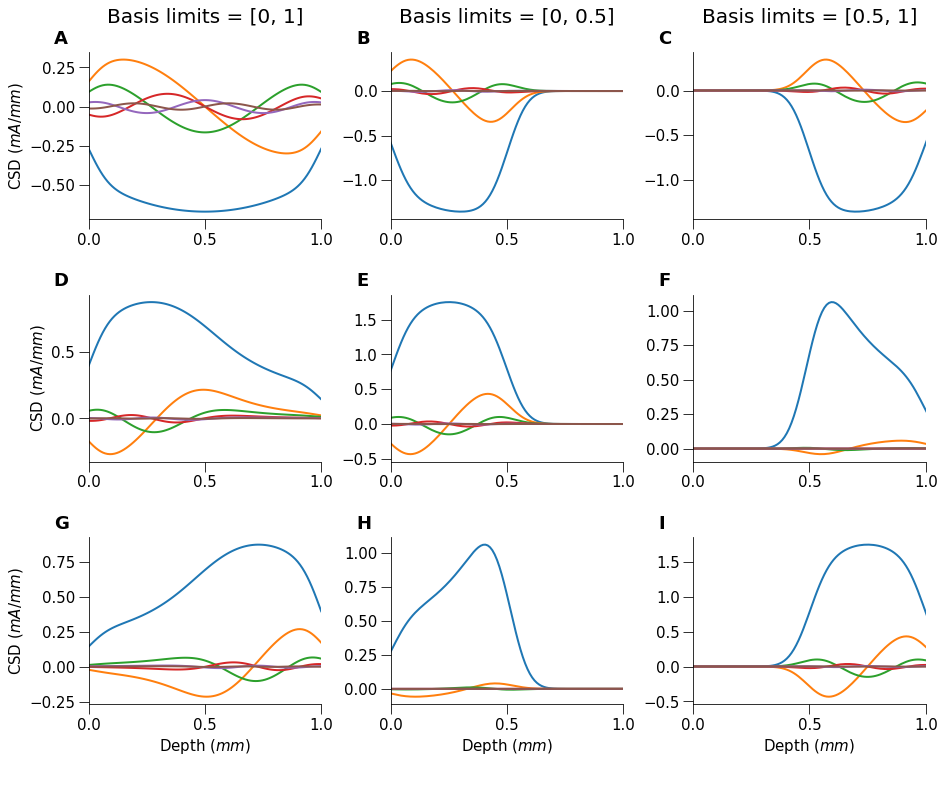

In [38]:
N_SRC = 64
TRUE_CSD_XLIMS = [0., 1.]
TOTAL_ELE = 12
R = 0.2
MU = 0.25
method = 'cross-validation'  # L-curve
#    method = 'L-curve'
Rs = np.array([0.2])
lambdas = np.zeros(1)
generate_figure(R, MU, N_SRC, TRUE_CSD_XLIMS, TOTAL_ELE,
                method=method, Rs=Rs, lambdas=lambdas, noise=0)

In [65]:
def csd_into_eigensource_projection(csd, eigensources):
    orthn = scipy.linalg.orth(eigensources)
    print('orthn', orthn.shape)
    return np.matmul(np.matmul(csd, orthn), orthn.T)

In [182]:
def plot_projection(ax, projection, estm_x, title=None, ele_pos=None,
                 xlabel=False, ylabel=False, letter='', t_max=None,
                 est_csd_LC=None):

    x = np.linspace(0, 1, 100)
    l1 = ax.plot(estm_x, projection, label='Projection', lw=2.)
    #if est_csd_LC is not None:
    #    l2 = ax.plot(estm_x, est_csd, '--', label='kCSD Cross-validation', lw=2.)
    #    l3 = ax.plot(estm_x, est_csd_LC, '.', label='kCSD L-Curve', lw=2.)
    #else:
    #    l2 = ax.plot(estm_x, est_csd, '--', label='kCSD', lw=2.)
    est_csd = projection
    ax.set_xlim([0, 1])
    if xlabel:
        ax.set_xlabel('Depth ($mm$)')
    if ylabel:
        ax.set_ylabel('CSD ($mA/mm$)')
    if title is not None:
        ax.set_title(title)
    if np.max(est_csd) < 1.2:
        ax.set_ylim(-0.2, 1.2)
        s1 = ax.scatter(ele_pos, np.zeros(len(ele_pos))-0.2, 17, 'k', label='Electrodes')
        s1.set_clip_on(False)
    elif np.max(est_csd) < 1.7:
        ax.set_ylim(-10000, 10000)
        s3 = ax.scatter(ele_pos, np.zeros(len(ele_pos))-10000, 17, 'k', label='Electrodes')
        s3.set_clip_on(False)
        ax.set_yticks([-7000, 0, 7000])
    if np.max(est_csd) > 500:
        ax.set_ylim(-7000, 7000)
        s3 = ax.scatter(ele_pos, np.zeros(len(ele_pos))-7000, 17, 'k', label='Electrodes')
        s3.set_clip_on(False)
        ax.set_yticks([-5000, 0, 5000])
    elif np.max(est_csd) > 50:
        ax.set_ylim(-100, 100)
        s2 = ax.scatter(ele_pos, np.zeros(len(ele_pos))-100, 17, 'k', label='Electrodes')
        s2.set_clip_on(False)
        ax.set_yticks([-70, 0, 70])
    ax.set_xticks([0, 0.5, 1])
    fb.set_axis(ax, letter=letter)
    # ax.legend(frameon=False, loc='upper center', ncol=3)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

In [181]:
def generate_figure_projection(R, MU, n_src, true_csd_xlims, total_ele,
                    method='cross-validation', Rs=None, lambdas=None,
                    noise=0):
    """
    Generates figure for targeted basis investigation.

    Parameters
    ----------
    R: float
        Thickness of the groundtruth source.
        Default: 0.2.
    MU: float
        Central position of Gaussian source
        Default: 0.25.
    nr_src: int
        Number of basis sources.
    true_csd_xlims: list
        Boundaries for ground truth space.
    total_ele: int
        Number of electrodes.
    save_path: string
        Directory.
    method: string
        Determines the method of regularization.
        Default: cross-validation.
    Rs: numpy 1D array
        Basis source parameter for crossvalidation.
        Default: None.
    lambdas: numpy 1D array
        Regularization parameter for crossvalidation.
        Default: None.
    noise: float
        Determines the level of noise in the data.
        Default: 0.

    Returns
    -------
    None
    """
    true_csd_projection = tb.csd_profile(np.linspace(-0.5, 1, 150), [R, MU])
    ele_lims = [0, 0.5]
    csd_at, true_csd, ele_pos, pots, val = tb.simulate_data(tb.csd_profile,
                                                            true_csd_xlims, R,
                                                            MU, total_ele,
                                                            ele_lims,
                                                            noise=noise)

    fig = plt.figure(figsize=(15, 12))
    widths = [1, 1, 1, 1]
    heights = [1, 1, 1]
    gs = gridspec.GridSpec(3, 4, height_ratios=heights, width_ratios=widths,
                           hspace=0.45, wspace=0.3)


    xmin = -0.5
    xmax = 1
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    
    ax = fig.add_subplot(gs[0, 0])
    fb.make_subplot(ax, true_csd, obj.values('CSD'), obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='A')
    
    eigensources = calculate_eigensources(obj)
    projection = csd_into_eigensource_projection(true_csd_projection, eigensources)
    anihilator = true_csd_projection - obj.values('CSD')[:, 0]
    
    ax = fig.add_subplot(gs[0, 1])
    plot_projection(ax, projection, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='B')
    
    ax = fig.add_subplot(gs[0, 2])
    plot_projection(ax, anihilator, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='C')
    
    ax = fig.add_subplot(gs[0, 3])
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='D')


    ele_lims = [0.5, 1]
    csd_at, true_csd, ele_pos, pots, val = tb.simulate_data(tb.csd_profile,
                                                            true_csd_xlims, R,
                                                            MU, total_ele,
                                                            ele_lims,
                                                            noise=noise)
    
    xmin = -0.5
    xmax = 1
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    
    ax = fig.add_subplot(gs[1, 0])
    fb.make_subplot(ax, true_csd, obj.values('CSD'), obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='E')
    
    eigensources = calculate_eigensources(obj)
    projection = csd_into_eigensource_projection(true_csd_projection, eigensources)
    anihilator = true_csd_projection - obj.values('CSD')[:, 0]
    
    ax = fig.add_subplot(gs[1, 1])
    plot_projection(ax, projection, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='F')
    
    ax = fig.add_subplot(gs[1, 2])
    plot_projection(ax, anihilator, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='G')
    
    ax = fig.add_subplot(gs[1, 3])
    make_subplot(ax, eigensources, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=False, ylabel=False, letter='H')

    
    true_csd_projection2 = tb.csd_profile(np.linspace(0, 1.5, 150), [R, MU])
    xmin = 0
    xmax = 1.5
    ext_x = -0.5
    obj = tb.modified_bases(val, pots, ele_pos, n_src, h=0.25,
                            sigma=0.3, gdx=0.01, ext_x=ext_x, xmin=xmin,
                            xmax=xmax, method=method, Rs=Rs, lambdas=lambdas)
    print(obj.estm_x)
    ax = fig.add_subplot(gs[2, 0])
    fb.make_subplot(ax, true_csd, obj.values('CSD'), obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=True, ylabel=True, letter='I')
    
    eigensources = calculate_eigensources(obj)
    projection = csd_into_eigensource_projection(true_csd_projection2, eigensources)
    anihilator = true_csd_projection2 - obj.values('CSD')[:, 0]
    
    ax = fig.add_subplot(gs[2, 1])
    plot_projection(ax, projection, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=True, ylabel=False, letter='J')
    
    ax = fig.add_subplot(gs[2, 2])
    plot_projection(ax, anihilator, obj.estm_x, ele_pos=ele_pos,
                 title=None, xlabel=True, ylabel=False, letter='K')
    
    ax = fig.add_subplot(gs[2, 3])
    ax = make_subplot(ax, eigensources, obj.estm_x,
                      ele_pos=ele_pos, title=None, xlabel=True, ylabel=False,
                      letter='L')
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, frameon=False)

    fig.savefig(os.path.join('Projection_targeted_basis_noise_' + str(noise) + '.png'), dpi=300)
    plt.show()

Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
lambd:  0.0
orthn (150, 12)
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
lambd:  0.0
orthn (150, 12)
Cross validating R (all lambda) : 0.2
R, lambda : 0.2 0.0
[0.         0.01006711 0.02013423 0.03020134 0.04026846 0.05033557
 0.06040268 0.0704698  0.08053691 0.09060403 0.10067114 0.11073826
 0.12080537 0.13087248 0.1409396  0.15100671 0.16107383 0.17114094
 0.18120805 0.19127517 0.20134228 0.2114094  0.22147651 0.23154362
 0.24161074 0.25167785 0.26174497 0.27181208 0.28187919 0.29194631
 0.30201342 0.31208054 0.32214765 0.33221477 0.34228188 0.35234899
 0.36241611 0.37248322 0.38255034 0.39261745 0.40268456 0.41275168
 0.42281879 0.43288591 0.44295302 0.45302013 0.46308725 0.47315436
 0.48322148 0.49328859 0.5033557  0.51342282 0.52348993 0.53355705
 0.54362416 0.55369128 0.56375839 0.5738255  0.58389262 0.59395973
 0.60402685 0.61409396 0.62416107 0.63422819 0.6442953  0.65436242
 0.66442953 0.67449664 0.68456376

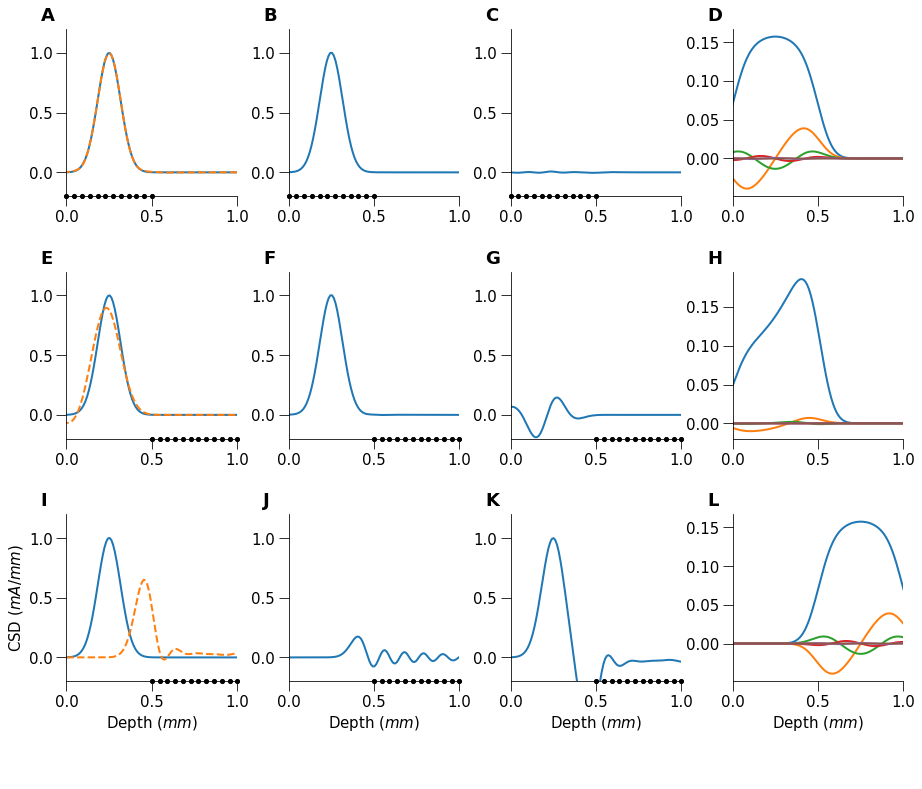

In [183]:
N_SRC = 64
TRUE_CSD_XLIMS = [0., 1.]
TOTAL_ELE = 12
R = 0.2
MU = 0.25
method = 'cross-validation'  # L-curve
#    method = 'L-curve'
Rs = np.array([0.2])
lambdas = np.zeros(1)
generate_figure_projection(R, MU, N_SRC, TRUE_CSD_XLIMS, TOTAL_ELE,
                method=method, Rs=Rs, lambdas=lambdas, noise=0)